# Q: What are the Top Rated and Most Rated Films (Mark)

We decided that aside from financial metrics like gross revenues, another important success metric is quality. User ratings is one of the ways we have defined quality, and we examined the average ratings of films on IMDB.com. One of the reasons we chose this source is that it had a large number of users contributing ratings to films. We also considered user ratings on The Movie Database webiste (TMDb) but decided not to use this data due to the comparatively lower number of user ratings per film. Of course the number of ratings can also be an important metric and we use it here as a rough proxy for film popularity. Note that this analysis was limited to English language films. 

### Importing Packages and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 100)

In [3]:
Full = pd.read_csv("df_7.csv")

### Understanding the Data Frame

First step is to understand the size, columns, and types of data that are contained in the dataframe. This dataframe is one that was the product of several merges, as I was originally planning to use some of the user rating data from TNDb and some from IMDB. We needed to get user ratings, movie names, and genres all into one dataframe from 2 different files. This dataframe started with about 14K rows.

In [4]:
print(Full.shape)
print(Full.dtypes)
Full.head()

(14219, 39)
tconst              object
averagerating      float64
numvotes             int64
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
Animation            int64
Sport                int64
Mystery              int64
Action               int64
Comedy               int64
Documentary          int64
Romance              int64
News                 int64
War                  int64
Horror               int64
Fantasy              int64
Family               int64
Music                int64
Musical              int64
Sci-Fi               int64
History              int64
Biography            int64
Thriller             int64
Crime                int64
Adventure            int64
Drama                int64
id                   int64
release_date        object
title               object
vote_average       float64
vote_count           int64
Year                 int64
category            object
primary_name    

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Animation,Sport,Mystery,Action,Comedy,Documentary,Romance,News,War,Horror,Fantasy,Family,Music,Musical,Sci-Fi,History,Biography,Thriller,Crime,Adventure,Drama,id,release_date,title,vote_average,vote_count,Year,category,primary_name,birth_year,death_year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Sean Hood,1966.0,NaN
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Daniel Giat,1955.0,NaN
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,188207,2014-01-10,The Legend of Hercules,4.5,805,2014,writer,Giulio Steve,NaN,NaN
3,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,74447,2010-10-26,The Hammer,6.5,16,2010,writer,Eben Kostbar,NaN,NaN
4,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,74447,2010-10-26,The Hammer,6.5,16,2010,writer,Joseph McKelheer,NaN,NaN


## EDA: 

First I took a look at some descriptive statistics and then tried a few visualizations to better see the central tendency and distribution of some of the key data (average ratings and number of ratings). Note that this helped me decide to proceed with just the IMDB data as it provided a better data set. Another advantage of using the IMDB data set is that they claim to have a weighted average score that helps filter out ballot stuffing.
The below just shows the steps for the IMDB data set. 

In [5]:
Full.averagerating.nunique()

85

In [6]:
Full.averagerating.isna().sum()

0

In [7]:
Full.averagerating.describe()

count    14219.000000
mean         5.797173
std          1.324626
min          1.100000
25%          5.000000
50%          5.900000
75%          6.700000
max          9.500000
Name: averagerating, dtype: float64

In [8]:
Full.numvotes.nunique()

4030

In [9]:
Full.numvotes.isna().sum()

0

In [10]:
Full.numvotes.describe().astype(int)

count      14219
mean       38723
std       104064
min            5
25%          198
50%         1403
75%        17596
max      1387769
Name: numvotes, dtype: int64

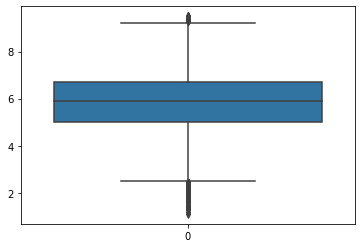

In [11]:
# Visualize the average ratings a little bit: as a box plot (median of 6 and more outliers on the lower end)
boxplot = sns.boxplot(data=Full['averagerating'])
boxplot

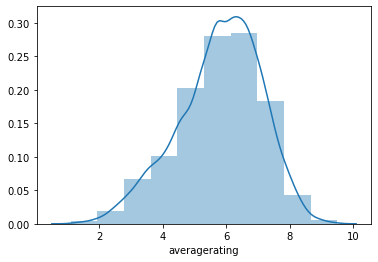

In [12]:
# Visualize this a little bit: as distribution plot (a fairly normal distribution; slight skew to the left)
distplot = sns.distplot(a=Full["averagerating"], bins=10)
distplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21e5c470>]],
      dtype=object)

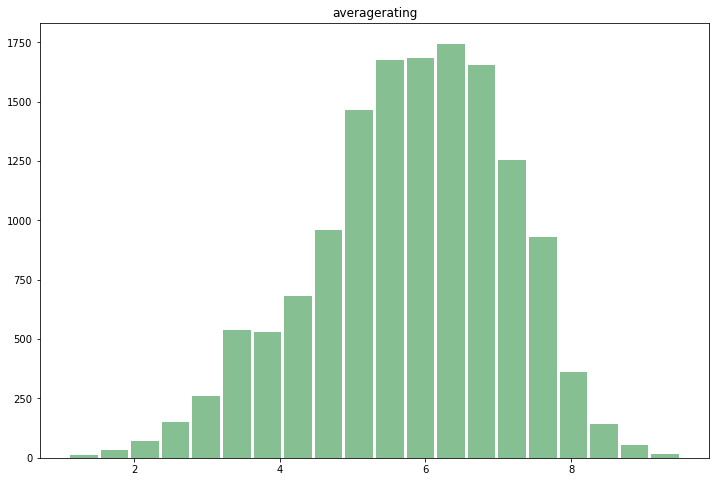

In [13]:
# Trying a different method of histogram as a comparison and to familiarize with different libraries. 
Full.hist(column='averagerating', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

### Initial df Pruning:

Next step is to cut down the df (from 39 to 5 columns) to make it easier to see and work with. These steps included:
1. Cut the df down to size for analysis of average rating and number of ratings
2. Limited the release date of the movies to a 5 year period (2013 to 2018)
3. Cut out movies with a low number of ratings (based on the IQR)
4. Drop duplicate movies in the df (based on similaries in all columns)
5. Sort primarily on average rating and secondarily on number of ratings. 

In [14]:
# Removing unnecesary columns
Ratings = Full[['Year', 'primary_title', 'genres', 'averagerating', 'numvotes']]
Ratings.head()

,Year,primary_title,genres,averagerating,numvotes
0,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
1,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
2,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
3,2010,The Hammer,"Biography,Drama,Sport",7.0,1613
4,2010,The Hammer,"Biography,Drama,Sport",7.0,1613


In [15]:
Ratings.Year.value_counts().sort_index()

2010    1082
2011    1382
2012    1280
2013    1734
2014    1697
2015    1862
2016    1851
2017    1793
2018    1538
Name: Year, dtype: int64

In [16]:
# Limit the Years to a 5-year period: 2013 - 2018
Ratingsb = Ratings.loc[Ratings.Year >= 2013]
print(Ratingsb.shape)
Ratingsb.head()

(10475, 5)


,Year,primary_title,genres,averagerating,numvotes
0,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
1,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
2,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
26,2015,Paradox,"Sci-Fi,Thriller",4.6,495
27,2015,Paradox,"Sci-Fi,Thriller",4.6,495


In [17]:
# Do an initial sort of ratings and numvotes
Ratingsb.sort_values(['averagerating','numvotes'], ascending=[False, False])
Ratingsb.head()

,Year,primary_title,genres,averagerating,numvotes
0,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
1,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
2,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
26,2015,Paradox,"Sci-Fi,Thriller",4.6,495
27,2015,Paradox,"Sci-Fi,Thriller",4.6,495


In [18]:
# Data above is odd.. why a bunch of documentaries? 
# Lets look at just descending order for numvotes - as a gauge of popularity? 
Ratingsc= Ratingsb.sort_values(['numvotes'], ascending=False)
Ratingsc.head()

,Year,primary_title,genres,averagerating,numvotes
6130,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
8954,2013,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358
8955,2013,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358
6339,2014,Guardians of the Galaxy,"Action,Adventure,Comedy",8.1,948394
6342,2014,Guardians of the Galaxy,"Action,Adventure,Comedy",8.1,948394


In [19]:
# Ok, that helps... so now let me try and get rid of duplicates...see what that will do, before commiting to it
Ratingsc.primary_title.duplicated().sum()

5483

In [20]:
# Ok, I will get rid of duplicates on the whole df
Ratingsd = Ratingsc.drop_duplicates(keep='first')
Ratingsd.head()
# It mostly worked? Still have some duplicate titles. 

,Year,primary_title,genres,averagerating,numvotes
6130,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
8954,2013,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358
6339,2014,Guardians of the Galaxy,"Action,Adventure,Comedy",8.1,948394
12453,2016,Deadpool,"Action,Adventure,Comedy",8.0,820847
1133,2015,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",8.1,780910


### Getting data ready for vizualization
Not sure if this was necessary, seemed that I needed a small df to indicate how many things should be in the plot. There is likely a way to select the number of rows to plot... but time was up. 

In [21]:
# Need to get data in shape for plotting...by cutting it down to 20 rows.
Ratingse = Ratingsd.iloc[0:20, :]
Ratingse.head()

,Year,primary_title,genres,averagerating,numvotes
6130,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
8954,2013,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358
6339,2014,Guardians of the Galaxy,"Action,Adventure,Comedy",8.1,948394
12453,2016,Deadpool,"Action,Adventure,Comedy",8.0,820847
1133,2015,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",8.1,780910


In [22]:
# Changing the axis for plotting... saw an example of this in a video and assumed it would make the plotting work. 
Ratingse.set_index('primary_title', inplace=True)
Ratingse.head()

,Year,genres,averagerating,numvotes
primary_title,,,,
Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
Mad Max: Fury Road,2015,"Action,Adventure,Sci-Fi",8.1,780910


#### Getting a second plotting df ready
I created a second df for the second part of the question... which movies have the highest average customer rating. Similar steps were followed to limit the number of rows, column sorting, and getting rid of low number of votes to improve sorting. 

In [23]:
# 3rd approach to filter out lower values... this time it worked. 
Ratings_high = Ratingsd.loc[Ratingsd.numvotes >= 17596]
Ratings_high.head()

,Year,primary_title,genres,averagerating,numvotes
6130,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
8954,2013,The Wolf of Wall Street,"Biography,Crime,Drama",8.2,1035358
6339,2014,Guardians of the Galaxy,"Action,Adventure,Comedy",8.1,948394
12453,2016,Deadpool,"Action,Adventure,Comedy",8.0,820847
1133,2015,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",8.1,780910


In [24]:
Ratings_high.shape

(959, 5)

In [25]:
# Now to sort it on my 2 columns. 
Ratings_high.sort_values(['averagerating','numvotes'], ascending=[False, False], inplace=True)
Ratings_high.head()
# Did that work right? Why sorting numvotes 1st? 

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,primary_title,genres,averagerating,numvotes
6130,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
13968,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926
7861,2018,Spider-Man: Into the Spider-Verse,"Action,Adventure,Animation",8.5,210869
8098,2017,Coco,"Adventure,Animation,Comedy",8.4,277194
2737,2014,The Hunt,Drama,8.3,242765


In [44]:
# Need to get data in shape for plotting...limit rows
Ratings_high2 = Ratings_high.iloc[0:20, :]
Ratings_high2.head()

,Year,primary_title,genres,averagerating,numvotes
6130,2014,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
13968,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926
7861,2018,Spider-Man: Into the Spider-Verse,"Action,Adventure,Animation",8.5,210869
8098,2017,Coco,"Adventure,Animation,Comedy",8.4,277194
2737,2014,The Hunt,Drama,8.3,242765


In [45]:
# Changing the axis for plotting
Ratings_high2.set_index('primary_title', inplace=True)
Ratings_high2.head()

,Year,genres,averagerating,numvotes
primary_title,,,,
Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926
Spider-Man: Into the Spider-Verse,2018,"Action,Adventure,Animation",8.5,210869
Coco,2017,"Adventure,Animation,Comedy",8.4,277194
The Hunt,2014,Drama,8.3,242765


### Creating Visualizations for Presesntation

After considerable exploration and trying out both Seaborn and MatPlotLib, I found a format that did the basics.I ran out of time to tweak more than just the basics. I worked with Joe to ensure that we had similar dimensions and style for our presentation. 

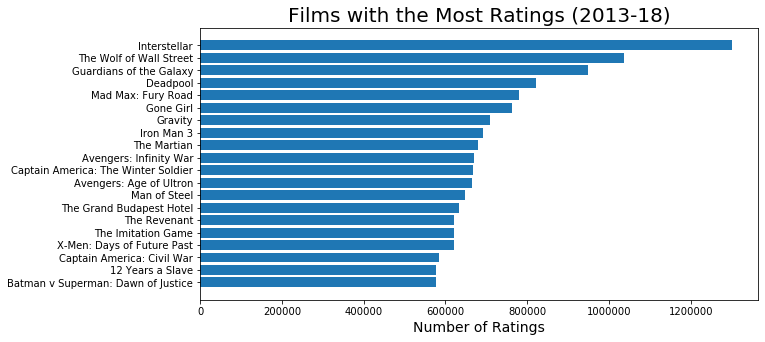

In [27]:
Ratingse= Ratingse.sort_values('numvotes')
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(Ratingse.index, Ratingse['numvotes'])
ax.set_title('Films with the Most Ratings (2013-18)', fontsize=20)
ax.set_xlabel('Number of Ratings', fontsize=14)
plt.show()

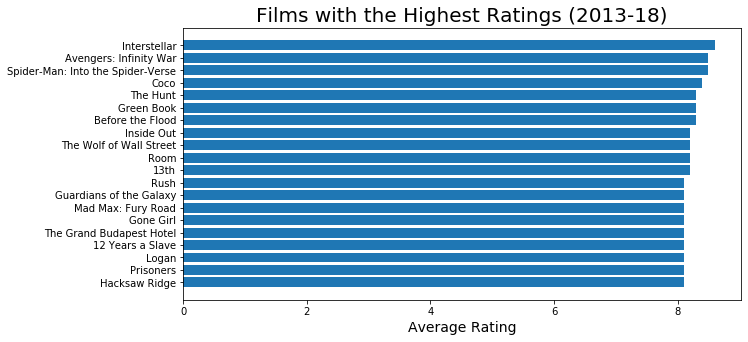

In [46]:
Ratings_high2= Ratings_high2.sort_values('averagerating')
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(Ratings_high2.index, Ratings_high2['averagerating'])
ax.set_title('Films with the Highest Ratings (2013-18)', fontsize=20)
ax.set_xlabel('Average Rating', fontsize=14)
plt.show()

### Conclusions

Based on the visualizations above, as well as the data frames, I make the following conclusions. 
1. I have determined and displayed the 20 films with the highest average user rating on IMDB. All of these films have an average rating of 8.1 or higher (up to 8.6). This is on a 10-point scale.
2. I have determined and displayed the 20 films with the most user ratings on IMDB. These films range in number of votes from 576,909 to a high of 1,299,334. This measure can be thought of as a form of popularity. 
3. 8 of the films appear on both of these Top 20 lists, indicating they are BOTH top rated and very popular. Interstellar is at the top of both lists, by quite a bit.
4. Iniital investigation shows that slightly different genres of film appear in each list. The Top Rated films are more likely Dramas(11), Adventure(8), Action(6), Biography(5) or Comedy(5). Wheras many of the Top Popular films are Adventure(15), Action(12), Sci-Fi(11), and Drama(7).
5. These lists of the Top 20 in Quality and Popluarity provides a starting point for disecting what makes these films a success which will help our clients re-use elements that lead to this form of success. 


## Appendix

#### EDA: 
To help address the potential issue of the user ratings being biased when there were a low number of ratings, I considered creating high, medium, and low bands for the number of votes. I would base this on the distrubion of the data (above the 75th percentile, in the IQR, below 25th percentile). This approach was abandoned when I realized since my ultimate goal was a small set of data, and that I could use sorting to help with this potential issue. 

In [ ]:
# Attempt at creating a new column for bands of the number of ratings. I feel this is missing a way to iterate through the rows. 
# How to go about creating a new column that takes the numvalues column and determines if value is high, med, or low.

# df.insert(5, 'Num_bands', '')
# Create a new column = Num_bands
# for each value in numvotes:
#     if numvotes <= 198:
#         make Num_bands = 'low'
#     elif numvotes == >= 17596:
#         make Num_bands = 'high'
#     else:
#         make Num_bands = 'med'

# Alternate approach... duplicate the column and change the values in placce?

#### EDA: using rating and popularity together?
Looking at the movies that have both high ratings and a large number of ratings(top of the top?) and tried plotting on their ranks in their respective lists. Not really tell me anything and plots are confusing. Abandoned this. 

In [30]:
# Create a plot of top 8 in both lists
Top8ranks = pd.read_csv("Top_8_films.csv")
Top8ranks.head()

,Unnamed: 0,popularity,rating,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Interstellar,1.0,1.0,NaN,NaN,NaN,NaN
1,The Wolf of Wall Street,2.0,8.0,NaN,NaN,NaN,NaN
2,Guardians of the Galaxy,3.0,12.0,NaN,NaN,NaN,NaN
3,Mad Max: Fury Road,5.0,13.0,NaN,NaN,NaN,NaN
4,Gone Girl,6.0,14.0,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Top 8 films ranked by popularity and ratings')

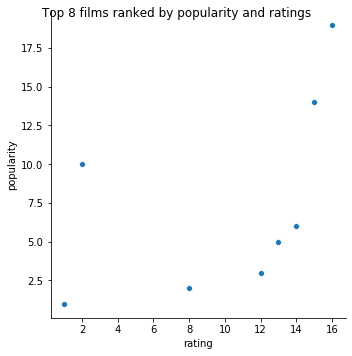

In [31]:
p=sns.relplot(x='rating', y='popularity', data=Top8ranks)
p.fig.suptitle("Top 8 films ranked by popularity and ratings")
# p.set_title("Top 8 films ranked by popularity and ratings")
# p.set(xlabel="Rating rank", ylabel="Popularity rank")

#### EDA: top genres represented from films that have BOTH high average ratings and large number of votes
Looked at the genres represented by the movies in both of our top 20 lists and saw some differences btween the lists . So tried plotting on genre counts. Ran out of time to go much further. Abandoned this. 

In [32]:
# This is the source data (form numvotes set) that was used to get the genre counts for the 20 movies with the most votes. 
Ratingse.genres.value_counts()

Action,Adventure,Sci-Fi       8
Adventure,Drama,Sci-Fi        2
Action,Adventure,Comedy       2
Biography,Drama,History       1
Action,Adventure,Fantasy      1
Action,Adventure,Biography    1
Biography,Drama,Thriller      1
Drama,Sci-Fi,Thriller         1
Drama,Mystery,Thriller        1
Adventure,Comedy,Crime        1
Biography,Crime,Drama         1
Name: genres, dtype: int64

In [33]:
# Create a plot of top genres listed for top 20
Top20_genres = pd.read_csv("top20_genres.csv")
Top20_genres.head()

,Unnamed: 0,genre,popular_count,rated_count,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Adventure,15.0,8.0,NaN,NaN,NaN
1,NaN,Action,12.0,6.0,NaN,NaN,NaN
2,NaN,Sci-Fi,11.0,4.0,NaN,NaN,NaN
3,NaN,Drama,7.0,11.0,NaN,NaN,NaN
4,NaN,Biography,4.0,5.0,NaN,NaN,NaN


Text(0.5, 0.98, 'Top genres by popularity and ratings')

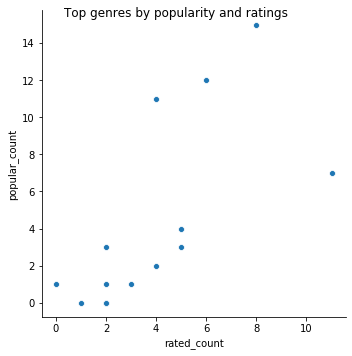

In [34]:
# Plotting the count data for genres.
g=sns.relplot(x='rated_count', y='popular_count', data=Top20_genres)
g.fig.suptitle("Top genres by popularity and ratings")

#### EDA on the TMDb data

In [35]:
Full.vote_average.nunique()

86

In [36]:
Full.vote_average.isna().sum()

0

In [37]:
Full.vote_average.describe()

count    14219.000000
mean         5.698938
std          1.570659
min          0.000000
25%          5.000000
50%          5.900000
75%          6.700000
max         10.000000
Name: vote_average, dtype: float64

In [38]:
Full.vote_count.nunique()

1414

In [39]:
Full.vote_count.isna().sum()

0

In [40]:
# NOTE: The median number of votes for a film in the dataset is just 24. This is compared to 1,403 in the IMDB data set. 
Full.vote_count.describe().astype(int)

count    14219
mean       739
std       1980
min          1
25%          4
50%         24
75%        338
max      20175
Name: vote_count, dtype: int64

#### EDA on the TMDb data...exploring correlations a little bit. 

In [41]:
Full.corr()['averagerating'].sort_values(ascending=False)

averagerating      1.000000
vote_average       0.527792
numvotes           0.325257
runtime_minutes    0.311571
vote_count         0.297104
Documentary        0.288992
Drama              0.214633
Biography          0.207595
History            0.127970
Sport              0.088354
Music              0.081626
News               0.072147
Romance            0.064260
Adventure          0.063502
Animation          0.054603
Musical            0.035468
War                0.019037
Family             0.010955
start_year         0.007524
Comedy             0.004470
Crime              0.003219
Year              -0.007645
Fantasy           -0.012853
Mystery           -0.037975
death_year        -0.040309
Action            -0.056208
id                -0.068952
Sci-Fi            -0.079821
birth_year        -0.116843
Thriller          -0.204665
Horror            -0.364015
Name: averagerating, dtype: float64

In [47]:
Ratingsd.corr()['averagerating'].sort_values(ascending=False)

averagerating    1.000000
numvotes         0.255882
Year            -0.020660
Name: averagerating, dtype: float64